In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Read the main table
CRSData = pd.read_excel('train.xlsx', sheet_name='train_5K')
CRSData.head(5)  # Display the first few rows of the dataframe

,ID,Customer_ID,Age,SSN,Occupation,AnnualIncome,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,OutstandingDebt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [3]:
CRSData.isnull().sum()

ID                            0
Customer_ID                   0
Age                           0
SSN                           0
Occupation                    0
AnnualIncome                  0
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
NumofLoan                     0
Type_of_Loan                  0
Month                         0
Delay_from_due_date           0
Num_of_Delayed_Payment      347
ChangedCreditLimit          109
Num_Credit_Inquiries        111
Credit_Mix                    0
OutstandingDebt               0
Credit_Utilization_Ratio      0
Credit_History_Age          474
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly     213
Payment_Behaviour           394
Monthly_Balance              66
Credit_Score                  0
dtype: int64

In [4]:
# Dropping irrelevant columns
CRSData.drop(['Month' , 'Type_of_Loan', 'Credit_History_Age', 'SSN','Credit_Mix'], axis=1, inplace=True)

In [5]:
#Treating missing values
CRSData['Num_of_Delayed_Payment'].fillna(CRSData['Num_of_Delayed_Payment'].median(), inplace=True)
CRSData['ChangedCreditLimit'].fillna(CRSData['ChangedCreditLimit'].median(), inplace=True)
CRSData['Num_Credit_Inquiries'].fillna(CRSData['Num_Credit_Inquiries'].median(), inplace=True)
CRSData['Amount_invested_monthly'].fillna(CRSData['Amount_invested_monthly'].mean(), inplace=True)
CRSData['Monthly_Balance'].fillna(CRSData['Monthly_Balance'].median(), inplace=True)

In [6]:
#Removing missing values from payment behaviour
CRSclean_df = CRSData.dropna(subset=['Payment_Behaviour'])
CRSclean_df.isnull().sum()

ID                          0
Customer_ID                 0
Age                         0
Occupation                  0
AnnualIncome                0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
NumofLoan                   0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
ChangedCreditLimit          0
Num_Credit_Inquiries        0
OutstandingDebt             0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [7]:
CRSclean_df.dtypes

ID                           object
Customer_ID                  object
Age                           int64
Occupation                   object
AnnualIncome                float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
NumofLoan                     int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
ChangedCreditLimit          float64
Num_Credit_Inquiries        float64
OutstandingDebt             float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [8]:
CRSclean_df.describe()

,Age,AnnualIncome,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,NumofLoan,Delay_from_due_date,Num_of_Delayed_Payment,ChangedCreditLimit,Num_Credit_Inquiries,OutstandingDebt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,4606.000000,4.606000e+03,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000
mean,32.906861,2.346439e+05,3605.423659,5.132436,5.183239,14.239036,3.371038,21.553409,26.468302,10.397169,21.910551,1430.196476,32.327141,1279.937058,663.160411,404.196197
std,11.099912,1.638638e+06,3305.152435,2.381124,1.766828,8.766111,2.532949,14.688945,186.369358,6.843400,162.168980,1195.066761,5.152708,7647.138691,2051.548192,214.165767
min,0.000000,7.103035e+03,0.000000,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-5.780000,0.000000,24.730000,20.172942,0.000000,0.000000,0.688299
25%,24.000000,1.979552e+04,1223.393333,3.000000,4.000000,7.000000,1.000000,11.000000,9.000000,5.335000,3.000000,512.380000,28.025624,27.801129,78.310632,271.899884
50%,33.000000,3.713102e+04,2693.353333,6.000000,5.000000,12.000000,3.000000,18.000000,14.000000,9.540000,5.000000,1126.350000,32.398794,68.458966,145.920513,340.886890
75%,42.000000,7.255936e+04,5242.952500,7.000000,6.000000,20.000000,5.000000,29.000000,18.000000,14.830000,8.750000,2019.510000,36.598417,152.506895,310.802550,466.342863
max,76.000000,2.097646e+07,14710.533330,9.000000,9.000000,34.000000,9.000000,67.000000,4128.000000,35.820000,2592.000000,4984.820000,47.969560,82204.000000,10000.000000,1534.963533


In [9]:
#Removing 'NM' values in the column 'Payment of Min Amount'
CRSclean_df = CRSclean_df[CRSclean_df['Payment_of_Min_Amount'] != 'NM']

In [10]:
numeric_cols = CRSclean_df.select_dtypes(exclude = "object").columns
cat_cols = CRSclean_df.select_dtypes(include = "object").columns
print(numeric_cols)
print(cat_cols)

Index(['Age', 'AnnualIncome', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'NumofLoan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'ChangedCreditLimit', 'Num_Credit_Inquiries',
       'OutstandingDebt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['ID', 'Customer_ID', 'Occupation', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [11]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = CRSclean_df[numeric_cols]
vif_data = pd.DataFrame({
    "feature": vif_df.columns,
    "VIF": [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))]
})
print(vif_data.head(17))

                     feature        VIF
0                        Age   8.673371
1               AnnualIncome   1.038370
2      Monthly_Inhand_Salary   3.368673
3          Num_Bank_Accounts   8.719239
4            Num_Credit_Card  10.394150
5              Interest_Rate   8.045249
6                  NumofLoan   5.262448
7        Delay_from_due_date   5.953996
8     Num_of_Delayed_Payment   1.025079
9         ChangedCreditLimit   4.539909
10      Num_Credit_Inquiries   1.022125
11           OutstandingDebt   5.772966
12  Credit_Utilization_Ratio  21.262176
13       Total_EMI_per_month   1.028623
14   Amount_invested_monthly   1.106380
15           Monthly_Balance   8.295479


In [12]:
#Shows few variables as High multicollinearity, indicating that the predictor is highly correlated with other predictors.
#We will apply PCA at the later steps

<Axes: >

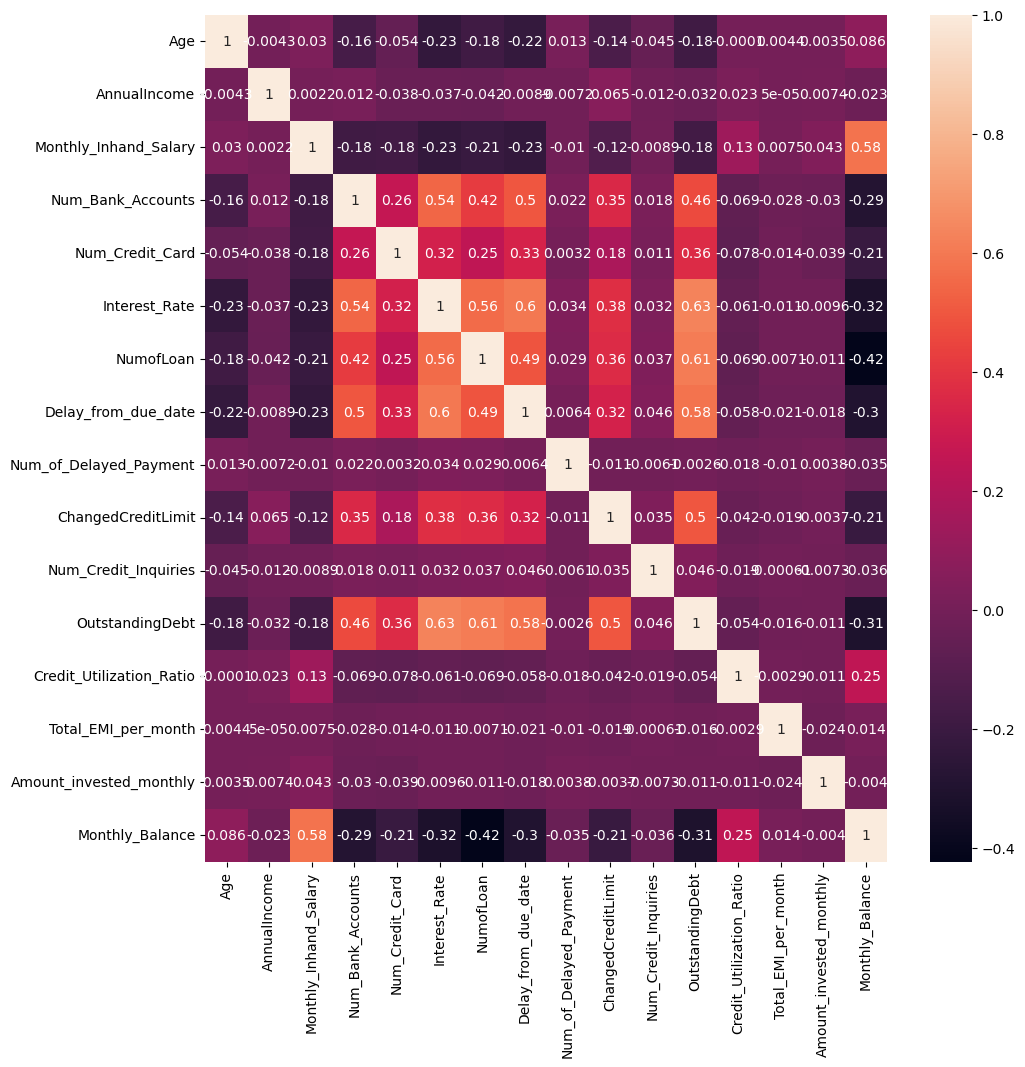

In [13]:
plt.figure(figsize= (11,11))
sns.heatmap(CRSclean_df[numeric_cols].corr(),annot=True)

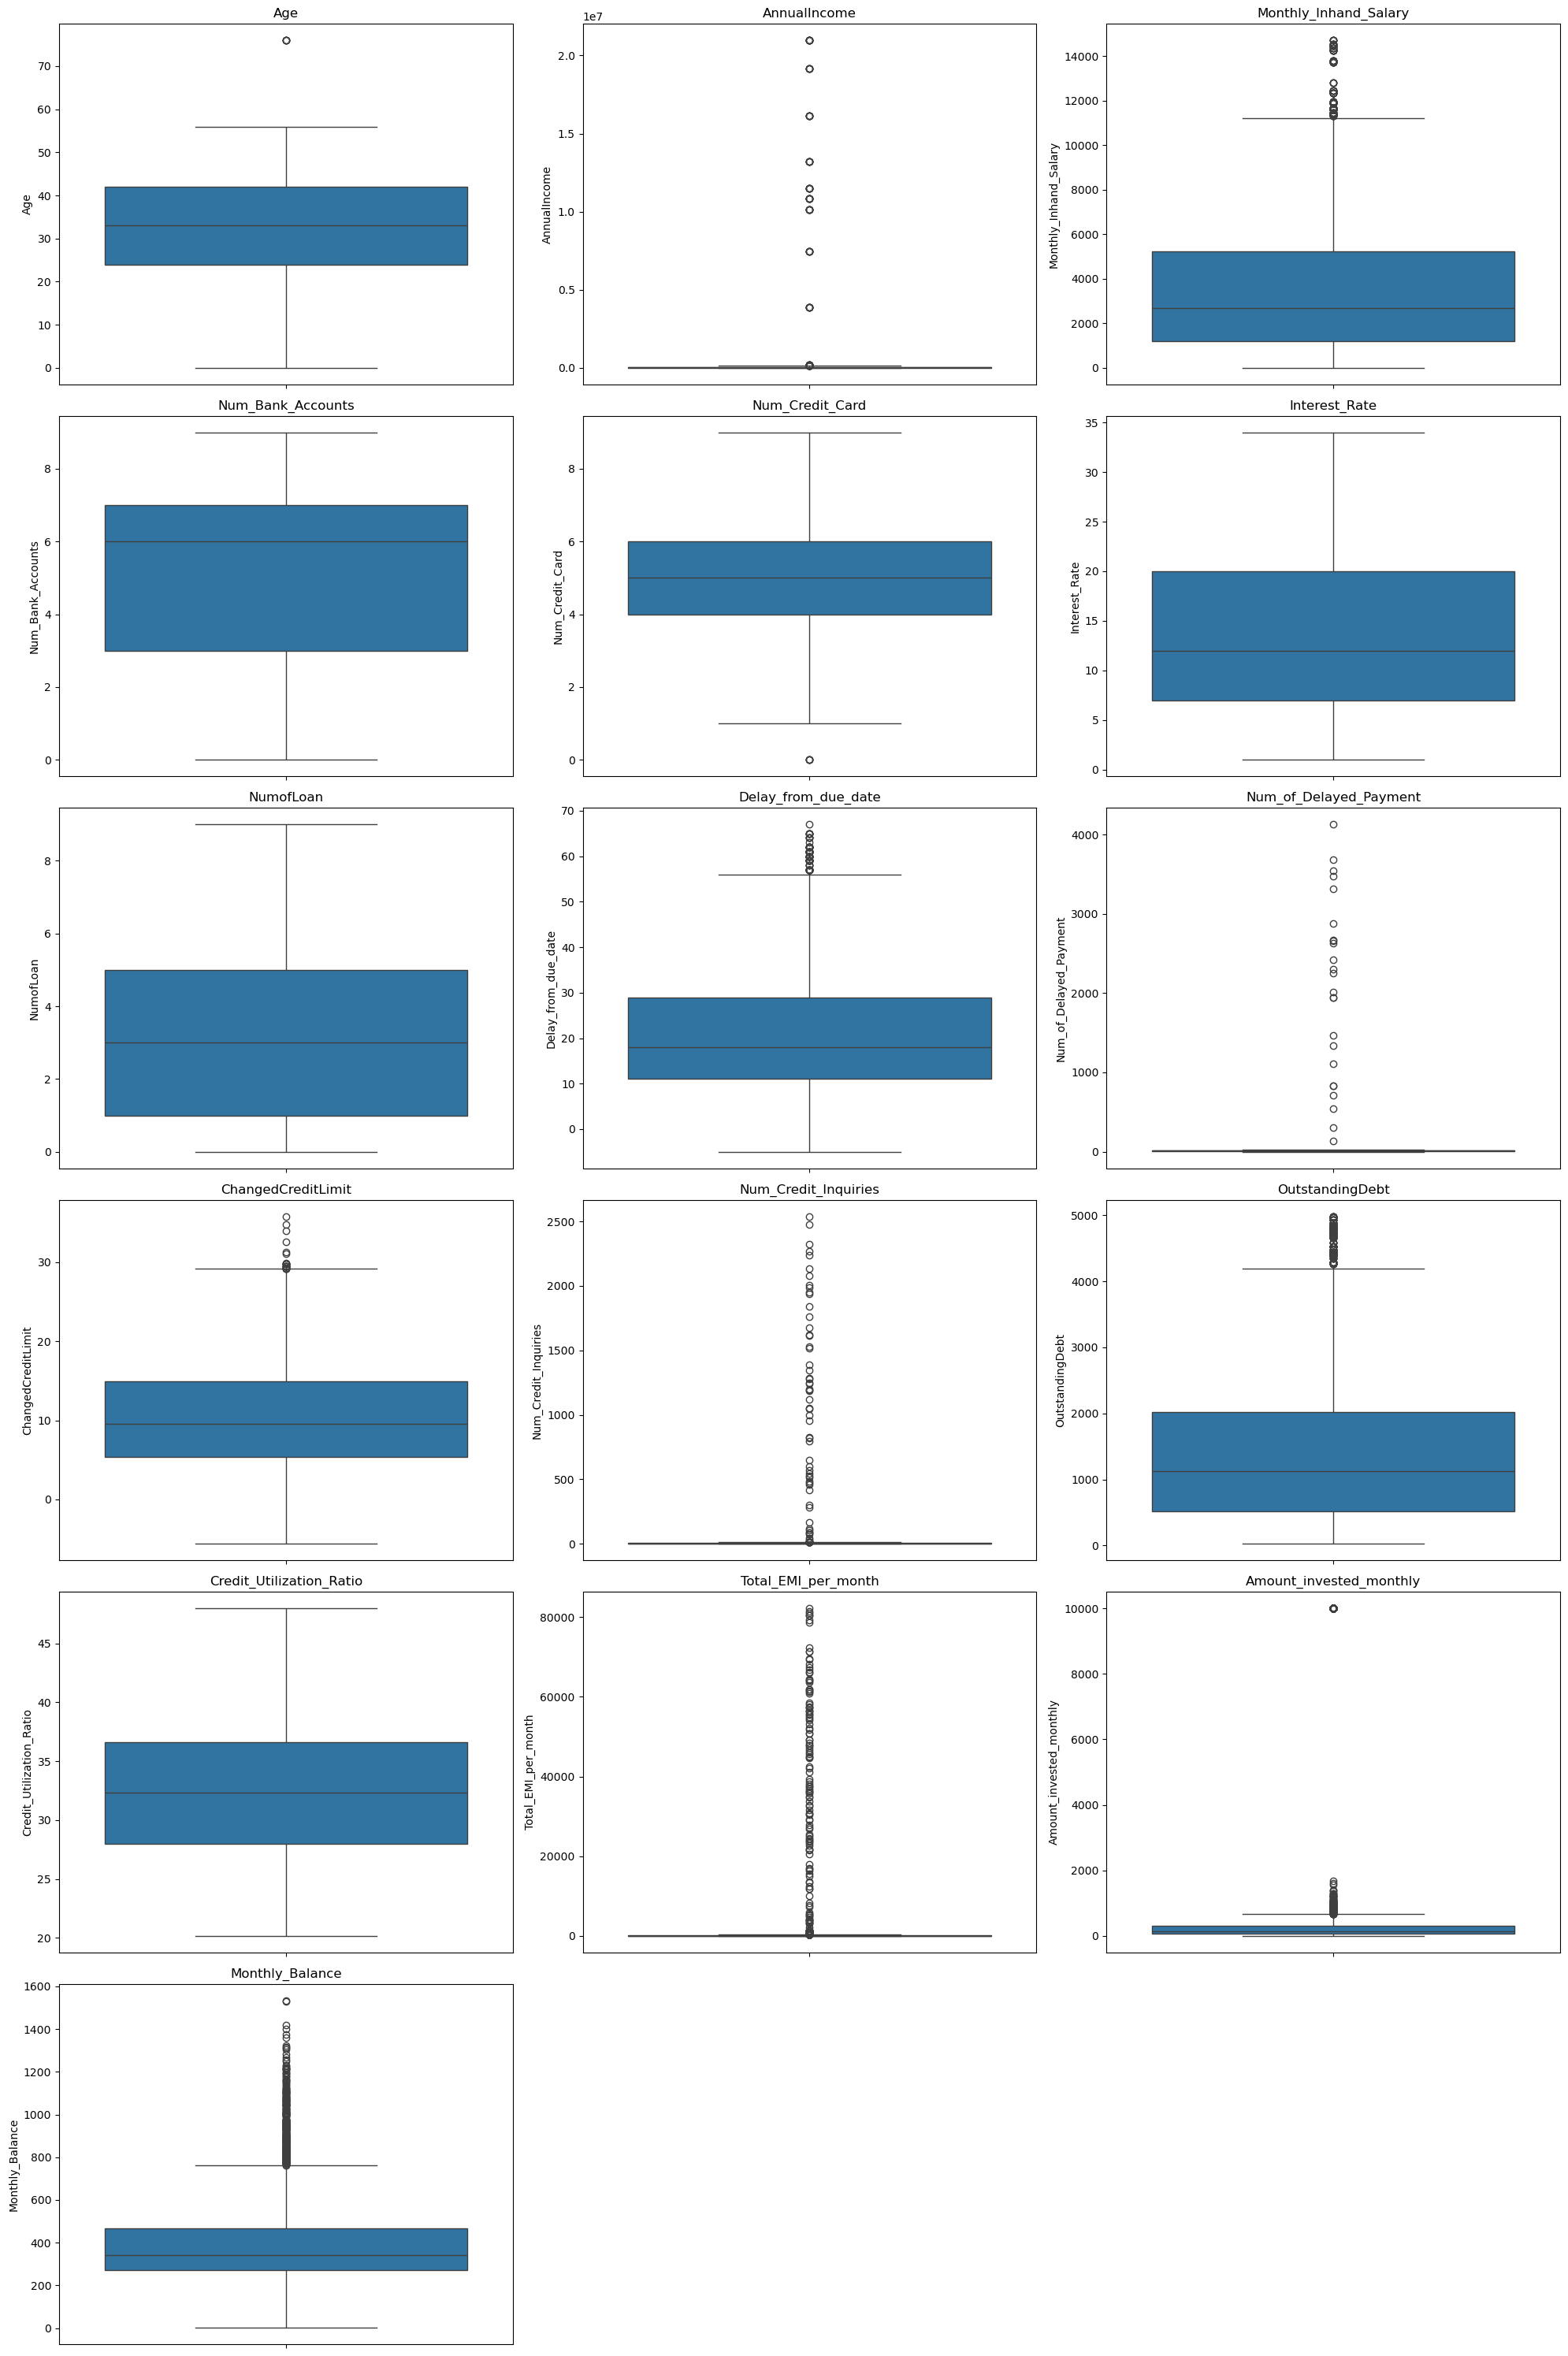

In [14]:
#Visualising boxplot
# Set the number of rows and columns for the subplots grid
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(numeric_cols) / num_cols))  # Calculate the number of rows needed
# Set the figure size for better visibility
plt.figure(figsize=(20, num_rows * 5))
# Create a boxplot for each numerical column
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=CRSclean_df[col])
    plt.title(col)
    plt.xlabel('')
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

In [20]:
#Replacing outlier with median

CRS_o_df = CRSclean_df[numeric_cols].copy()

for col in numeric_cols:
    # Calculate the 0.05th and 99.95th percentiles
    Q1 = np.percentile(CRS_o_df[col], 0.05, interpolation='midpoint')
    Q3 = np.percentile(CRS_o_df[col], 99.95, interpolation='midpoint')
    median = CRS_o_df[col].median()
# Replace outliers with the median
CRS_o_df[col] = np.where((CRS_o_df[col] < Q1) | (CRS_o_df[col] > Q3), median,CRS_o_df[col])

# Display the first few rows of the cleaned DataFrame
print(CRS_o_df)

      Age  AnnualIncome  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23      19114.12            1824.843333                  3   
1      23      19114.12            1824.843333                  3   
2      23      19114.12            1824.843333                  3   
3      23      19114.12            1824.843333                  3   
4      23      19114.12            1824.843333                  3   
...   ...           ...                    ...                ...   
4992   20      77519.04            6184.920000                  6   
4994   20      77519.04            6184.920000                  6   
4996   20      77519.04            6184.920000                  6   
4998   20      77519.04            6184.920000                  6   
4999   20      77519.04            6184.920000                  6   

      Num_Credit_Card  Interest_Rate  NumofLoan  Delay_from_due_date  \
0                   4              3          4                    3   
1                   4      

In [22]:
#Visualisation

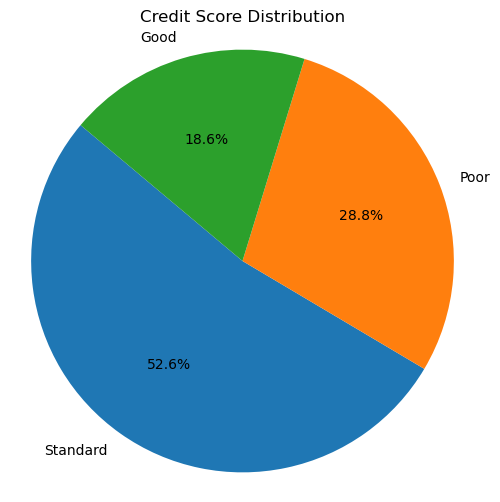

In [23]:
#Proportion of credit score
credit_score_counts =CRSclean_df['Credit_Score'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Credit Score Distribution')
plt.axis('equal') 
plt.show()

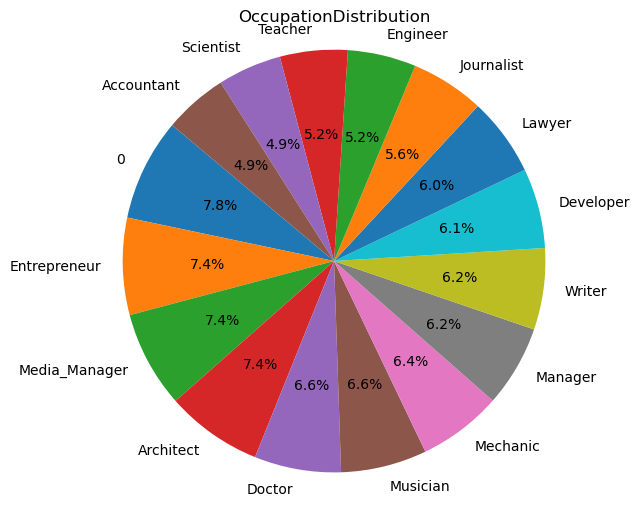

In [24]:
#Proportion of occupation
Occupation_counts =CRSclean_df['Occupation'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Occupation_counts, labels=Occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('OccupationDistribution')
plt.axis('equal') 
plt.show()

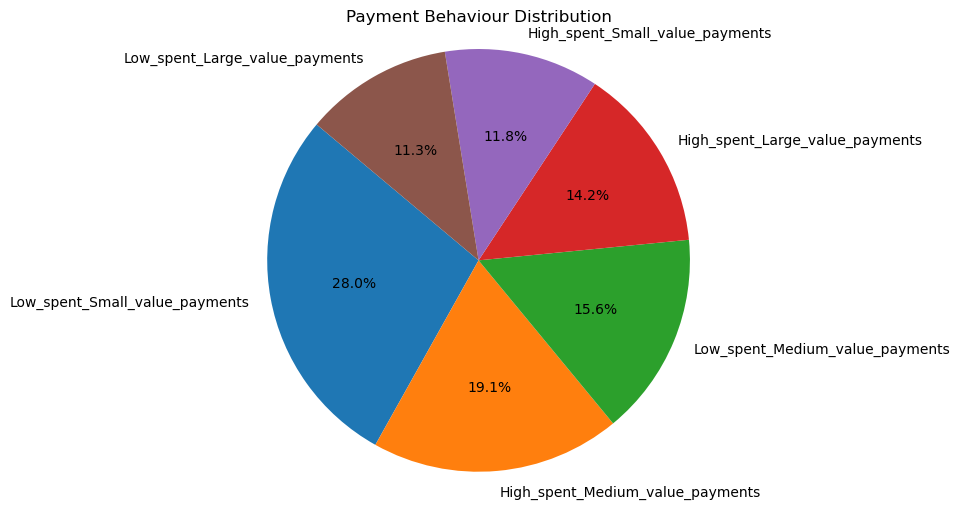

In [25]:
#Proportion of Payment Bheaviour
PB_counts =CRSclean_df['Payment_Behaviour'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(PB_counts, labels=PB_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Behaviour Distribution')
plt.axis('equal') 
plt.show()

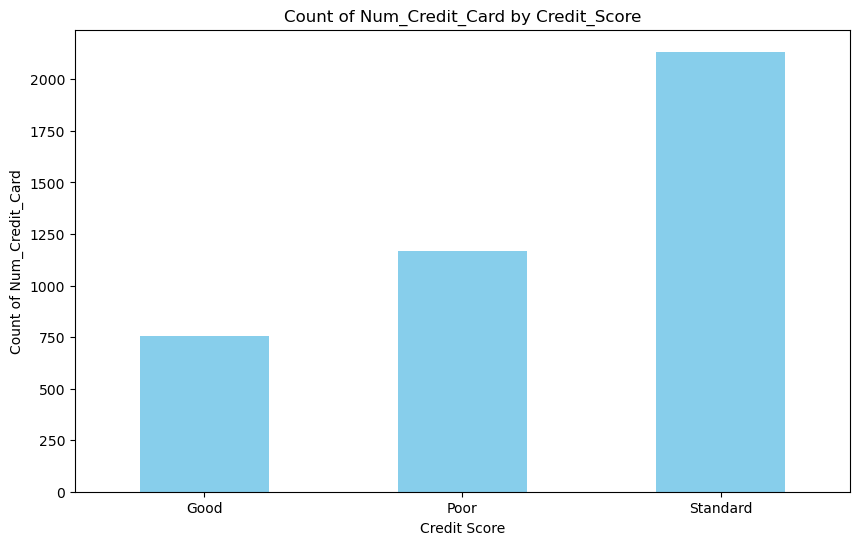

In [26]:
#Number of credit card by credit score
credit_card_counts = CRSclean_df.groupby('Credit_Score')['Num_Credit_Card'].count()
plt.figure(figsize=(10, 6))
credit_card_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Num_Credit_Card by Credit_Score')
plt.xlabel('Credit Score')
plt.ylabel('Count of Num_Credit_Card')
plt.xticks(rotation=0)
plt.show()

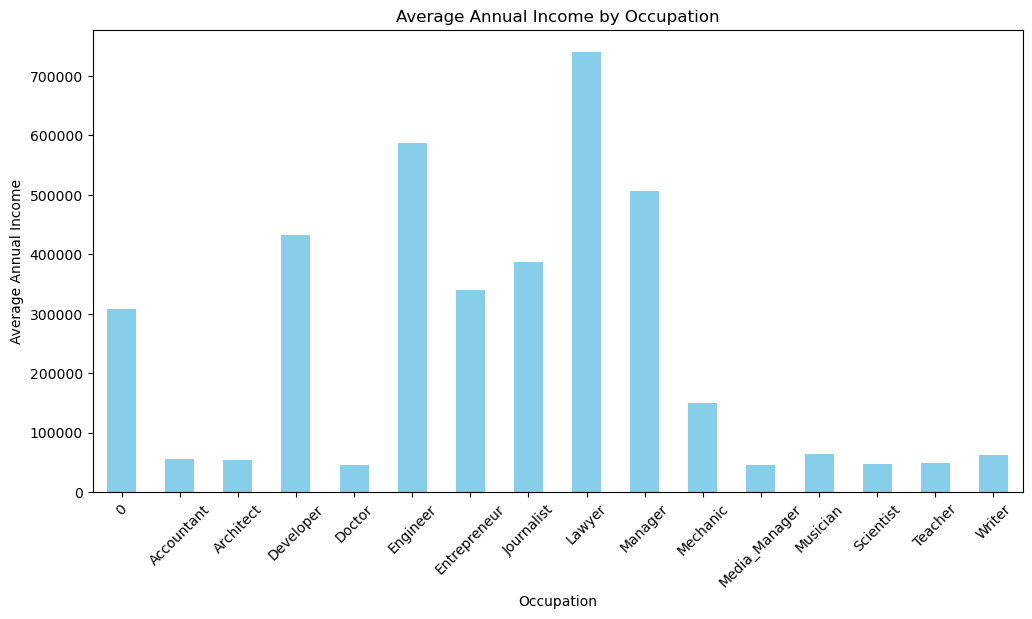

In [27]:
average_income_by_occupation = CRSclean_df.groupby('Occupation')['AnnualIncome'].mean()
plt.figure(figsize=(12, 6))
average_income_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Average Annual Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Occupation', ylabel='count'>

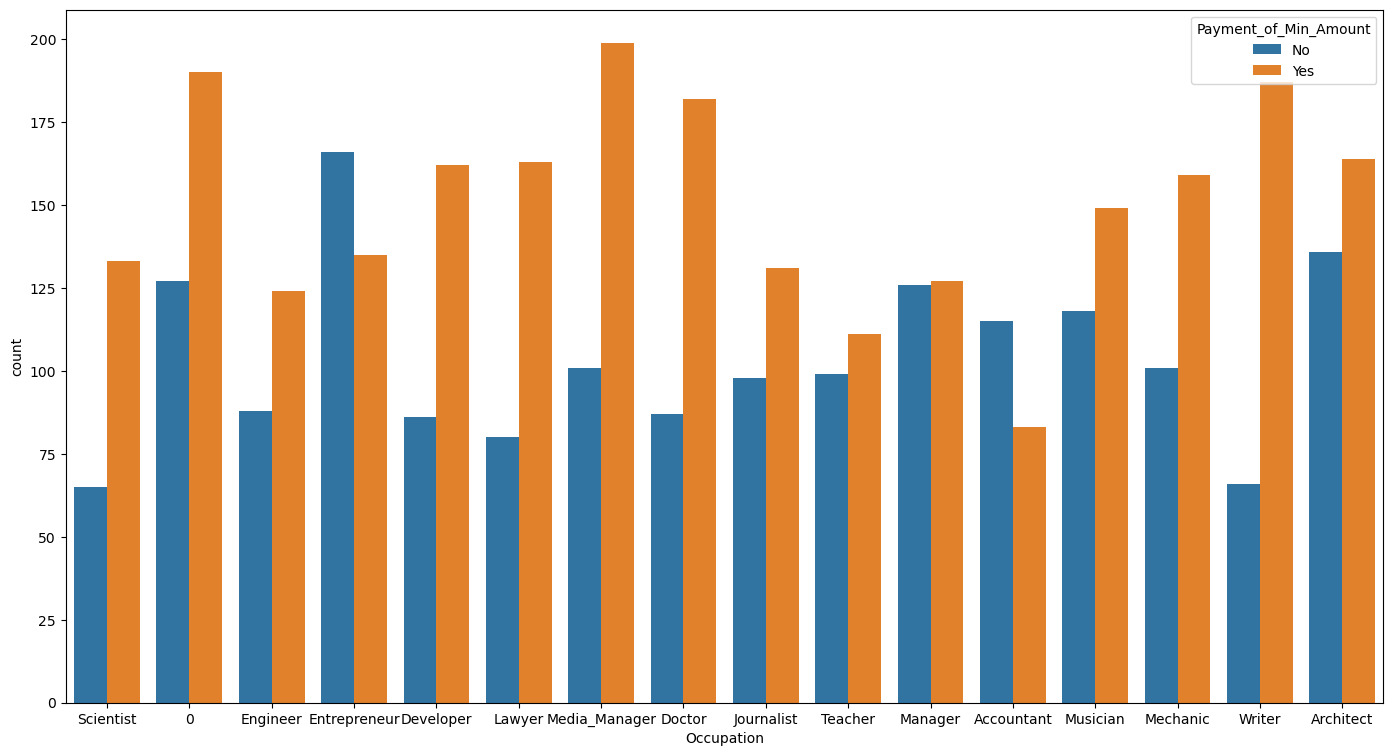

In [28]:
#Occupaton by payment of min amount
fig = plt.figure(figsize= (17,9))
sns.countplot(data=CRSclean_df,x="Occupation",hue="Payment_of_Min_Amount")

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_data = scaler.fit_transform(CRS_o_df)

In [30]:
column_names = ['Age', 'AnnualIncome', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'NumofLoan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'ChangedCreditLimit', 'Num_Credit_Inquiries',
       'OutstandingDebt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']
scaled_df = pd.DataFrame(Scaled_data, columns=column_names)
print(scaled_df)

           Age  AnnualIncome  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0    -0.896816     -0.133059              -0.535027          -0.895374   
1    -0.896816     -0.133059              -0.535027          -0.895374   
2    -0.896816     -0.133059              -0.535027          -0.895374   
3    -0.896816     -0.133059              -0.535027          -0.895374   
4    -0.896816     -0.133059              -0.535027          -0.895374   
...        ...           ...                    ...                ...   
4053 -1.167033     -0.097818               0.786885           0.367695   
4054 -1.167033     -0.097818               0.786885           0.367695   
4055 -1.167033     -0.097818               0.786885           0.367695   
4056 -1.167033     -0.097818               0.786885           0.367695   
4057 -1.167033     -0.097818               0.786885           0.367695   

      Num_Credit_Card  Interest_Rate  NumofLoan  Delay_from_due_date  \
0           -0.679015      -1.288470   

In [31]:
cat_df = CRSclean_df[cat_cols].copy()
print(cat_df)

          ID Customer_ID Occupation Payment_of_Min_Amount  \
0     0x1602   CUS_0xd40  Scientist                    No   
1     0x1603   CUS_0xd40  Scientist                    No   
2     0x1604   CUS_0xd40  Scientist                    No   
3     0x1605   CUS_0xd40  Scientist                    No   
4     0x1606   CUS_0xd40  Scientist                    No   
...      ...         ...        ...                   ...   
4992  0x3342  CUS_0x69ea    Manager                   Yes   
4994  0x3344  CUS_0x69ea    Manager                   Yes   
4996  0x3346  CUS_0x69ea    Manager                   Yes   
4998  0x3348  CUS_0x69ea    Manager                   Yes   
4999  0x3349  CUS_0x69ea    Manager                   Yes   

                     Payment_Behaviour Credit_Score  
0      High_spent_Small_value_payments         Good  
1       Low_spent_Large_value_payments         Good  
2      Low_spent_Medium_value_payments         Good  
3       Low_spent_Small_value_payments         Good

In [35]:
scaled_df.reset_index(drop=True, inplace=True)
cat_df.reset_index(drop=True, inplace=True)
combined_df = pd.concat([scaled_df, cat_df], axis=1)
print(combined_df)

           Age  AnnualIncome  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0    -0.896816     -0.133059              -0.535027          -0.895374   
1    -0.896816     -0.133059              -0.535027          -0.895374   
2    -0.896816     -0.133059              -0.535027          -0.895374   
3    -0.896816     -0.133059              -0.535027          -0.895374   
4    -0.896816     -0.133059              -0.535027          -0.895374   
...        ...           ...                    ...                ...   
4053 -1.167033     -0.097818               0.786885           0.367695   
4054 -1.167033     -0.097818               0.786885           0.367695   
4055 -1.167033     -0.097818               0.786885           0.367695   
4056 -1.167033     -0.097818               0.786885           0.367695   
4057 -1.167033     -0.097818               0.786885           0.367695   

      Num_Credit_Card  Interest_Rate  NumofLoan  Delay_from_due_date  \
0           -0.679015      -1.288470   

In [36]:
combined_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
combined_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
combined_df = pd.get_dummies(combined_df, columns = ['Occupation', 'Payment_Behaviour'])
print(combined_df)

           Age  AnnualIncome  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0    -0.896816     -0.133059              -0.535027          -0.895374   
1    -0.896816     -0.133059              -0.535027          -0.895374   
2    -0.896816     -0.133059              -0.535027          -0.895374   
3    -0.896816     -0.133059              -0.535027          -0.895374   
4    -0.896816     -0.133059              -0.535027          -0.895374   
...        ...           ...                    ...                ...   
4053 -1.167033     -0.097818               0.786885           0.367695   
4054 -1.167033     -0.097818               0.786885           0.367695   
4055 -1.167033     -0.097818               0.786885           0.367695   
4056 -1.167033     -0.097818               0.786885           0.367695   
4057 -1.167033     -0.097818               0.786885           0.367695   

      Num_Credit_Card  Interest_Rate  NumofLoan  Delay_from_due_date  \
0           -0.679015      -1.288470   

In [37]:
#Feature selection

In [44]:
X = combined_df.drop(['Credit_Score','ID','Customer_ID'] , axis=1)  # Features
y = combined_df['Credit_Score'] 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [49]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
#  want to see the importance of each feature
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

OutstandingDebt                                       0.100637
Interest_Rate                                         0.077233
Delay_from_due_date                                   0.071425
Num_of_Delayed_Payment                                0.060973
ChangedCreditLimit                                    0.060035
Monthly_Balance                                       0.055960
Credit_Utilization_Ratio                              0.053063
Amount_invested_monthly                               0.052788
Num_Credit_Inquiries                                  0.050916
AnnualIncome                                          0.045035
Total_EMI_per_month                                   0.042580
Age                                                   0.039624
Num_Credit_Card                                       0.039228
Monthly_Inhand_Salary                                 0.039025
Num_Bank_Accounts                                     0.034715
Payment_of_Min_Amount                                 0

In [52]:
#Going forward with these feature : OutstandingDebt, Interest_Rate ,Delay_from_due_date, 
#Num_of_Delayed_Payment, ChangedCreditLimit, Monthly_Balance, Credit_Utilization_Ratio, Amount_invested_monthly, Num_Credit_Inquiries, AnnualIncome

In [56]:
#Specifying x and Y
X1 = combined_df[['OutstandingDebt', 'Interest_Rate' ,'Delay_from_due_date', 'Num_of_Delayed_Payment', 'ChangedCreditLimit', 'Monthly_Balance', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Num_Credit_Inquiries', 'AnnualIncome']]
y1 = combined_df['Credit_Score']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [58]:
#MODEL ANALYSIS
